In [6]:
# Executer cette cellule si hymnasium et numpy ne sont pas installés
!pip install gymnasium[toy-text]
!pip install numpy

In [1]:
import gymnasium as gym
import numpy as np
import time

### <font color="blue"> Un environnement de jouet !
Vous pouvez produire une rendue de l'environnement. Il exist plusieurs modes de rendu:
-  "human": Affiche l'environnement dans une fenêtre à l'aide du backend de rendu. Il n'est pas recommander d'utiliser cette option durant l'entrainement car cela ralentie considérablement le processus d'entrainement.
- "rgb_array": Renvoie un tableau RGB représentant l'image rendue sans l'afficher dans une fenêtre. Util si vous souhaitez enregistrer une video du processus d'entrainement sans avoir un impact sur la vitesse du processus d'entrainement.
- "ansi": Rend l'environnement sous forme de texte dans la console en utilisant des codes d'échappement ANSI.
- ...

In [7]:
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human") # Environnement avec des actions deterministics avec l'argument is_slippery=False
env.reset()

# L'espace des états et l'espace des actions.
print("Espace des états: ", env.observation_space)
print("Espace des actions: ", env.action_space)

env.render()
time.sleep(10.0)
env.close()

Espace des états:  Discrete(16)
Espace des actions:  Discrete(4)


### <font color="blue"> Nous allons interagir avec l'environnement en choisissant les actions de manière aléatoire.

In [2]:
def interacte_with_env(env, iter=100):
    env.reset()
    for _ in range(iter):
      env.render()
      time.sleep(0.5)
      action = env.action_space.sample() #Choisir une action de manière aléatoire
      observation, reward, terminated, truncated, info = env.step(action)
      #print("Récompense: ", reward)
      #print("Info: ", info)
      if terminated or truncated: #verifier si l'état (observation) est un état terminal
        observation = env.reset()
    env.close()

In [13]:
# Appeler la fonction d'interaction pour interagir de manière aléatoire avec l'environnement
env = gym.make('FrozenLake-v1', is_slippery=False, render_mode="human")
interacte_with_env(env, 20)

### <font color="blue"> Carte customisé
 Cette environnement simple que nous utilisons est une carte avec des lac. Vous pouvez customiser ce environnement en taille, emplacement et nombre des lac et emplacement de l'etat final qui a une recompense
 - S: état initial
 - F: état normal
 - H: lac
 - G: état final

In [2]:
default_frozen_lake = [
    "SFFF",
    "FHFH",
    "FFFH",
    "HFFG"
    ]

custom_frozen_lake=[
                    'SFHFHF',
                    'FFHFFF',
                    'FHHHFF',
                    'FFFHHH',
                    'FHFFHF',
                    'FHFHFG',
                    'HFFFFH'
    
]

In [24]:
# Créer l'environnement avec notre carte customizé et appeler la fonction d'interaction definie plus haut
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, render_mode="human")
interacte_with_env(env, 10)

In [3]:
# Nous definisons une fonction utilitaire pour executer une politique donnée.
# Elle sera utiliser après
def execution_politique(politique, env):
    state, _ = env.reset()
    terminated = False
    truncated = False
    while not (terminated or truncated):
        env.render()
        time.sleep(0.5)
        action = int(politique[state])
        state, reward, terminated, truncated, info = env.step(action)
    time.sleep(2.0)
    env.close()

### <font color='blue'/> Evaluation d'une politique

In [5]:
# Une fonction pour evaluer une politique donnée.
# Rappel: L'evaluation de la politique corresponds au calcul de la fonction de valeur associé à cette politique
def evaluation_politique(env, politique, gamma=0.9):
  Vs = np.zeros(env.observation_space.n)
  theta = 1e-20
  num_iters = 0
  while True:
    num_iters += 1 # cette variable ne fait pas partie de l'algo, c'est juste pour voir à combien d'itération on va converger.
    delta = 0
    for state in range(env.observation_space.n):
          v = Vs[state]
          action = politique[state]
          r_plus_Vsprime = 0
          for sprime_r in env.unwrapped.P[state][action]:
              p_sprime_r, sprime, recompense,_ = sprime_r
              r_plus_Vsprime += p_sprime_r * (recompense + gamma*Vs[sprime])
          Vs[state] = r_plus_Vsprime
          diff_val = np.fabs(v - Vs[state])
          delta = max(delta, diff_val)
    print("iteration: ",num_iters, "  diff: ", delta)
    if delta <= theta:
          print("Convergence de Vs après ", num_iters, " itérations !!!")
          print("----------------------------")
          break
  return Vs

In [33]:
# ici nous definisons une politique pi_1 et nous lévaluons
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
pi_1 = [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 0, 2, 2, 2, 0]
Vs_evalue = evaluation_politique(env, pi_1, gamma=0.9)
print(Vs_evalue) #

iteration:  1   diff:  1.0
iteration:  2   diff:  0.9
iteration:  3   diff:  0.81
iteration:  4   diff:  0.7290000000000001
iteration:  5   diff:  0.6561000000000001
iteration:  6   diff:  0.5904900000000002
iteration:  7   diff:  0.5314410000000002
iteration:  8   diff:  0.47829690000000014
iteration:  9   diff:  0.43046721000000016
iteration:  10   diff:  0.38742048900000015
iteration:  11   diff:  0
Convergence de Vs après  11  itérations !!!
----------------------------
[0.38742049 0.34867844 0.         0.         0.         0.
 0.43046721 0.38742049 0.         0.         0.         0.
 0.4782969  0.         0.         0.         0.         0.
 0.531441   0.59049    0.6561     0.         0.         0.
 0.4782969  0.         0.729      0.81       0.         1.
 0.43046721 0.         0.81       0.9        1.         0.        ]


In [27]:
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
env.reset()
env.render()

In [28]:
env.close()

In [29]:
# ici nous definisons une politique pi_2 et nous lévaluons (OBSERVER COMMENT LES VALEURS obtenues avec pi_2 different avec celles obtenues 
# avec pi_2. En effet la politique pi_1 est une politique optimale que j'ai expressement choisie. Pour chacun des 36 état, pi_1 a des V(s)
# meilleures que pi_2)
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
pi_2 = [1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 3, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 0, 2, 2, 2, 0]
Vs_evalue = evaluation_politique(env, pi_2, gamma=0.92)
print(Vs_evalue) #

iteration:  1   diff:  1.0
iteration:  2   diff:  0.92
iteration:  3   diff:  0.8464
iteration:  4   diff:  0.778688
iteration:  5   diff:  0.7163929600000001
iteration:  6   diff:  0
Convergence de Vs après  6  itérations !!!
----------------------------
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.71639296 0.         0.         0.
 0.         0.         0.778688   0.8464     0.         1.
 0.         0.         0.8464     0.92       1.         0.        ]


In [13]:
# Vous pouvez executer une des politique ici pour voir ce que ca donne.
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
execution_politique(pi_1, env)

### <font color="blue"> Utilisons quelques algorithmes d'apprentissage par renforcement pour que l'agent puisse apprendre à éviter les troues et atteindre l'état final G.

Nous utilisons la **méthode d'itération de valeur**.

Rappel:
1. L'itération de valeur est une méthode de programmation dynamique
2. En entrée nous avons besoin du modèle de l'environnement (Fonction de transition et de récompense), les espaces des états et actions.
3. La méthode étant itérative, nous avons besoin de définir la condition d'arrêt. Nous allons indiquez un nombre maximum d'itérations à ne pas dépasser et un paramètre delta de convergence.
4. En sortie nous aurons une fonction de valeur optimale et une politique optimale

Nous utilisons la **méthode d'itération de politique.**

In [4]:
# Nous devons extraire la politique optimale à partir de fonction de valeur obtenue
# Cette fonction est utiliser dans l'itération de politique et l'itération de valeur.
def extraire_politique(env, Vs, gamma=0.9):
  # Definir la politique
  politique = np.zeros(env.observation_space.n)    
  for state in range(env.observation_space.n):
    Qs = np.zeros(env.action_space.n)
    for action in range(env.action_space.n):
      for sprime_r in env.unwrapped.P[state][action]:
          p_sprime_r, sprime, recompense,_ = sprime_r
          Qs[action] += p_sprime_r * (recompense + gamma*Vs[sprime])
    politique[state] = np.argmax(Qs)
  return politique

In [28]:

sampled_value_integer = np.random.randint(0, 4)

print(sampled_value_integer)

0


In [12]:
# La fonction pour l'iteration de politique
def iteration_politique(env,  max_iter=5000, gamma=0.9):
  # Definir une politique initiale
  politique = np.zeros(env.observation_space.n) # une politique initial
  for i in range(env.observation_space.n):
      politique[i] = np.random.randint(0, 4)

  # Faire l'iteration de politique (succession entre evaluation et amélioration)
  i = 0
  while True:
    Vs = evaluation_politique(env, politique, gamma) # evaluation de la politique
    nouvelle_politique = extraire_politique(env, Vs, gamma)   # amélioration de la politique
    # Verifier si la politique est stable
    if (np.all(nouvelle_politique == politique)):
      print("La politique a convergé après ", i, " itérations !")
      break
    # Si la politique n'est pas stable alors continuer
    politique = nouvelle_politique
    i += 1
  return nouvelle_politique

In [17]:
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
politique_op_it = iteration_politique(env, 5000, 0.9)
print(politique_op_it)

iteration:  1   diff:  0
Convergence de Vs après  1  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0
Convergence de Vs après  2  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0
Convergence de Vs après  2  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0.81
iteration:  3   diff:  0
Convergence de Vs après  3  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0.81
iteration:  3   diff:  0.7290000000000001
iteration:  4   diff:  0
Convergence de Vs après  4  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0.81
iteration:  3   diff:  0.7290000000000001
iteration:  4   diff:  0.6561000000000001
iteration:  5   diff:  0
Convergence de Vs après  5  itérations !!!
----------------------------
iteration:  1   diff:  1.0
iteration:  2   diff:  0.81
iteration:  3   di

In [18]:
# Appeler la fonction pour executer la politique optimale obtenue plus haut.
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
execution_politique(politique_op_it, env)

In [8]:
# Une fonction permettant de faire l'itération de valeur
def iteration_valeur(env, max_iter=5000, gamma=0.9): #lambda est le coéfficient de dépreciation
  Vs = np.zeros(env.observation_space.n) # Initialisation de la fonction de valeur pour tous les états.
  epsilon = 1e-5 #Pour verifier la convergence
  num_iters = 0
  for i in range(max_iter):
    delta = 0
    num_iters += 1 # cette variable ne fait pas partie de l'algo, c'est juste pour voir à combien d'itération on va converger.
    #Vs_copy = np.copy(Vs) #garder une copie de la fonction des valeurs pour comparaison
    for state in range(env.observation_space.n):
      Qs = []
      v = Vs[state]
      for action in range(env.action_space.n):
        r_plus_Vsprime = []
        for sprime_r in env.unwrapped.P[state][action]:
          p_sprime_r, sprime, recompense,_ = sprime_r
          r_plus_Vsprime.append(p_sprime_r * (recompense + gamma*Vs[sprime]))
        Qs.append(np.sum(r_plus_Vsprime))
      Vs[state] = max(Qs)
      delta = max(delta, np.fabs(v - Vs[state]))
    if delta <= epsilon:
      break
  print("Convergence après ", num_iters, " itérations !!!")
  return Vs, Qs

In [19]:
# Utiliser la fonction d'iteration de valeur pour trouver une politique optimale
gamma = 0.9
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="rgb_array")
Vs, Q = iteration_valeur(env, max_iter=5000, gamma=gamma)
print(Vs)

Convergence après  12  itérations !!!
[0.3138106  0.28242954 0.         0.         0.         0.
 0.34867844 0.3138106  0.         0.         0.         0.
 0.38742049 0.         0.         0.         0.         0.
 0.43046721 0.4782969  0.531441   0.         0.         0.
 0.38742049 0.         0.59049    0.531441   0.         1.
 0.34867844 0.         0.6561     0.         1.         0.
 0.         0.6561     0.729      0.81       0.9        0.        ]


In [21]:
# Utiliser la fonction d'extraction de politique pour extraire la politique optimale
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
politique_op = extraire_politique(env, Vs, gamma=gamma)
print(politique_op)

[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 2. 2. 1. 0. 0. 0.
 3. 0. 1. 0. 0. 1. 3. 0. 1. 0. 2. 0. 0. 2. 2. 2. 3. 0.]


In [22]:
# Executon la politique optimale
# Appeler la fonction pour executer la politique
env = gym.make('FrozenLake-v1', desc=custom_frozen_lake, is_slippery=False, render_mode="human")
execution_politique(politique_op, env)

### <font color="blue"> Méthode de Monte Carlo pour le contrôle (ou la recherche de politique optimale) </font>

In [82]:
# Politique epsilon-gloutonne
# epsilon est typiquement très faible
def epsilon_gloutonne(env, state, Qs, epsilon):
  if np.random.rand() < epsilon:
    action = env.action_space.sample()
  else:
    action = max(list(range(env.action_space.n)), key = lambda x: Qs[(state,x)])
  return action

# Politique final Gloutonne
def extraire_politique_Qs(env, Qs):
  politique = np.zeros(env.observation_space.n)
  for state in range(env.observation_space.n):
    action = max(list(range(env.action_space.n)), key = lambda x: Qs[(state,x)])
    politique[state] = action
  return politique

In [124]:
from collections import defaultdict
import sys
# La fonction qui implemente le contrôle MC avec la politique espilon-gloutonne
def mc_control(env, num_episodes, episode_max_length = 100, gamma=0.9, epsilon=0.1):
    sum_Rt = defaultdict(float)
    num_Rt = defaultdict(float) 
    Qs = {}
    for s in range(env.observation_space.n):
        for a in range(env.action_space.n):
            Qs[(s,a)] = 0.0
    for episode in range(1, num_episodes+1):
        #Generer l séquence état-action-récompense pour l'épisode actuel
        episode_sar = []
        state, _ = env.reset()
        for t in range(episode_max_length):
            action = epsilon_gloutonne(env, state, Qs, epsilon)
            sprime, reward, terminated, truncated, info = env.step(action)
            episode_sar.append((state, action, reward))
            if terminated or truncated:
                break
            state = sprime
        #print(episode_sar)
        # Trouver tous les couples état-action dans cette épisode
        sa_in_episode = set([(x[0], x[1]) for x in episode_sar]) # set permet de retenir une seule instance de chaque couple état-action
        # Pour chaque couple (etat-action) calculer le retour attendue à partir de sa prémière apparution
        for sa in sa_in_episode:
            state = sa[0]
            action = sa[1]
            for i, x in enumerate(episode_sar):
                if x[0] == state and x[1]==action:
                    first_occurence_idx = i
                    break
            # La somme des recompense à partir de la première apparution du couple (etat, action) dans l'épisode
            #print(sa)
            #print(first_occurence_idx)
            Rt = 0.0
            k = 0
            for x in episode_sar[first_occurence_idx:]:
                Rt += (x[2]*gamma)
                k += 1
            sum_Rt[sa] += Rt
            num_Rt[sa] += 1.0
            Qs[(state, action)] =  sum_Rt[sa] / num_Rt[sa]

        # Imprimer le numéro de l'épisode actuelle (juste pour suivie de l'entrainement)
        if episode%500 == 0:
            print("\rEpisode {}/{}.".format(episode, num_episodes), end="")
            sys.stdout.flush()
    print("")
    return Qs

In [126]:
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="rgb_array")
Qs = mc_control(env, num_episodes=50000, episode_max_length = 50, gamma=0.9, epsilon=0.3)
print(f"Q(s, a): {Qs}")

Episode 50000/50000.
Q(s, a): {(0, 0): 0.22977973568283067, (0, 1): 0.5141905425413006, (0, 2): 0.2613453339649575, (0, 3): 0.28805620608900623, (1, 0): 0.09275039036359516, (1, 1): 0.0, (1, 2): 0.5157246782316913, (1, 3): 0.2652303120356583, (2, 0): 0.16739606126914713, (2, 1): 0.6454819277108679, (2, 2): 0.4088642659279791, (2, 3): 0.516209476309229, (3, 0): 0.4920000000000015, (3, 1): 0.0, (3, 2): 0.3056603773584906, (3, 3): 0.2755102040816325, (4, 0): 0.24108265424913708, (4, 1): 0.6061759925704105, (4, 2): 0.0, (4, 3): 0.3464774104206475, (5, 0): 0.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0, (6, 0): 0.0, (6, 1): 0.7845991561181942, (6, 2): 0.0, (6, 3): 0.6440758293838881, (7, 0): 0.0, (7, 1): 0.0, (7, 2): 0.0, (7, 3): 0.0, (8, 0): 0.3890695915280042, (8, 1): 0.0, (8, 2): 0.6976510067116118, (8, 3): 0.4333255651363473, (9, 0): 0.49584415584417085, (9, 1): 0.7710769230769593, (9, 2): 0.7849026561483644, (9, 3): 0.0, (10, 0): 0.6807829181494869, (10, 1): 0.882019713735662, (10, 2): 0.0

In [127]:
# Extraire la politique gloutonne à partir de la connaissance de Qs
politique_mc =extraire_politique_Qs(env, Qs)
print(f"Politique: {politique_mc}")
# Executer la politique
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="human")
execution_politique(politique_mc, env)

Politique: [1. 2. 1. 0. 1. 0. 1. 0. 2. 2. 1. 0. 0. 2. 2. 0.]


### <font color="blue"> Utilisons un des algorithmes d'apprentissage par renforcement pour que l'agent puisse apprendre à éviter les troues et atteindre l'état final G. Nous utilisons en premier lieu la **méthode Q-learning**.

In [129]:
# Q-Learning
def q_learning(env,Q_init, epsilon, gamma, alpha, max_episodes=5000):
  #Initialiser la fonction action-valeur
  Qs = Q_init
  # for each episode
  for i in range(max_episodes):
    state, _ = env.reset() #initialiser l'environnement au debut de l'épisode
    iter = 0
    while True: # Tant que l'épisode n'est pas fini
      # Selectionner une action suivant une politique epsilon-gloutonne
      action = epsilon_gloutonne(env, state, Qs, epsilon)
      #print(action)

      # Entreprendre l'action selectionné et observer la récompense et le nouveau état
      sprime, reward, terminated, truncated, info = env.step(action)
      # Mettre la fonction action-valeur à jour
      Q_max = max(Qs[(sprime, a)] for a in range(env.action_space.n))
      Qs[(state, action)] += alpha*(reward + gamma*Q_max - Qs[(state, action)])
      # remplacer l'état actuelle avec le nouveau état pour continuer à envancer dans l'environnement
      state = sprime
      iter += 1
      # Si un état terminal est visité alors finir l'épisode
      if (terminated or truncated or iter > 100):
        break
    if i%500 == 0:
        print("\rEpisode {}/{}.".format(i, max_episodes), end="")
        sys.stdout.flush()
  return Qs

In [130]:
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="rgb_array")
# Initialiser la fonction action-valeur à zero pour tout (s, a) dans SxA
q = {}
for s in range(env.observation_space.n):
 for a in range(env.action_space.n):
  q[(s,a)] = 0.0

# Appeler la fonction q_learning
Qs = q_learning(env, q, epsilon=0.4, gamma=0.9, alpha=0.3, max_episodes=50000)

Episode 49500/50000.

In [24]:
def extraire_politique_Qs(env, Qs):
  politique = np.zeros(env.observation_space.n)
  for state in range(env.observation_space.n):
    action = max(list(range(env.action_space.n)), key = lambda x: Qs[(state,x)])
    politique[state] = action
  return politique

In [131]:
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="human")
politique_q_learning = extraire_politique_Qs(env, Qs)
execution_politique(politique_q_learning, env)

### <font color='blue'/> Observer la recompense moyenne par épisode

In [132]:
# Q-Learning
def q_learning(env,Q_init, epsilon, gamma, alpha, max_episodes=5000):
  #Initialiser la fonction action-valeur
  Qs = Q_init
  G = []
  frames = [] # Pour enregistrer les images de l'environnement.
  # for each episode
  for i in range(max_episodes):
    state, _ = env.reset() #initialiser l'environnement au debut de l'épisode
    G_episode = 0
    pas_episode = 0
    while True: # Tant que l'épisode n'est pas fini
      # Selectionner une action suivant une politique epsilon-gloutonne
      action = epsilon_gloutonne(env, state, Qs, epsilon)
      # Entreprendre l'action selectionné et observer la récompense et le nouveau état
      sprime, reward, terminated, truncated, info = env.step(action)
      # Mettre la fonction action-valeur à jour
      Q_max = max(Qs[(sprime, a)] for a in range(env.action_space.n))
      Qs[(state, action)] += alpha*(reward + gamma*Q_max - Qs[(state, action)])
      G_episode += reward
      pas_episode +=1
      # remplacer l'état actuelle avec le nouveau état pour continuer à envancer dans l'environnement
      state = sprime
      # Si un état terminal est visité alors finir l'épisode
      if (terminated or truncated):
          break

      if i%100 == 0 and pas_episode < 100:
          frames.append(env.render())
    G.append(G_episode)
    if i%1000 == 0:
      print("\rEpisode {}/{}.".format(i, max_episodes), end="")
  G = np.cumsum(G)/np.arange(1,max_episodes+1)
  env.close()
  return Qs, G, frames

In [133]:
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="rgb_array")

# Initialiser la fonction action-valeur à zero pour tout (s, a) dans SxA
q = {}
for s in range(env.observation_space.n):
 for a in range(env.action_space.n):
  q[(s,a)] = 0.0
Qs, G, frames = q_learning(env, q, epsilon=0.5, gamma=0.9, alpha=0.3, max_episodes=3000 )

Episode 2000/3000.

In [ ]:
# Une fonction qui enregistre la liste des frames comme video
def frames_to_video(frames, fps, video_path):
    # Définir le codec et créer un objet VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    frame_size = (frames[0].shape[1], frames[0].shape[0])  # Width x Height
    video_writer = cv2.VideoWriter(video_path, fourcc, fps, frame_size)
    brg_frames = [cv2.cvtColor(frame, cv2.COLOR_RGB2BGR) for frame in frames]
    # Écriture de chaque image dans le fichier vidéo
    for frame in brg_frames:
        video_writer.write(frame)
    video_writer.release()
    print(f"Video saved to {video_path}")

# Appeler la fonction ci-dessus pour enregistrer une video
frames_to_video(frames, 10, "q_learning.avi")

Video saved to q_learning.avi


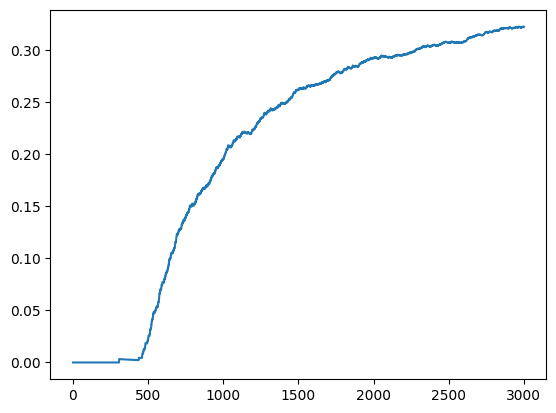

In [135]:
# Visualiser le retour attendu par episode.
import matplotlib.pyplot as plt
plt.plot(range(1, len(G)+1), G)

In [ ]:
# Extraire la politique optimale et executer là
env = gym.make('FrozenLake-v1', desc=default_frozen_lake, is_slippery=False, render_mode="human")
politique_q_learning = extraire_politique_Qs(env, Qs)
execution_politique(politique_q_learning, env)